## Validate NSFG data

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import math

import matplotlib.pyplot as plt

from empiricaldist import Cdf

import marriage

from marriage import value_counts, decorate

<IPython.core.display.Javascript object>

In [4]:
# Make the figures smaller to save some screen real estate.
# The figures generated for the book have DPI 400, so scaling
# them by a factor of 4 restores them to the size in the notebooks.
plt.rcParams["figure.dpi"] = 75
plt.rcParams["figure.figsize"] = [6, 3.5]

<IPython.core.display.Javascript object>

## Cycle 3

Note: Early cycles of the NSFG oversampled married women, so it's pretty important to correct for stratified sampling!

In [5]:
resp3 = marriage.ReadFemResp1982()
marriage.Validate1982(resp3)
resp3.shape

(7969, 34)

<IPython.core.display.Javascript object>

In [6]:
value_counts(resp3["rwant"])

rwant
1    5053
5    2916
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<Axes: xlabel='ager'>

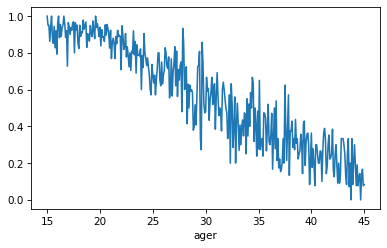

<IPython.core.display.Javascript object>

In [7]:
resp3["want_yes"] = resp3["rwant"] == 1
resp3.groupby("ager")["want_yes"].mean().plot()

In [8]:
# value_counts(resp3['nchildhh'])

<IPython.core.display.Javascript object>

In [9]:
value_counts(resp3["intent"])

intent
1    3937
2    3673
3     359
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [10]:
value_counts(resp3["addexp"])

addexp
0.0    3566
0.5      63
1.0    1393
1.5     197
2.0    1579
2.5     229
3.0     534
3.5      78
4.0     221
4.5      14
5.0      48
5.5      10
6.0      16
6.5       1
7.0       4
8.0       9
9.0       7
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [11]:
value_counts(resp3["rmarital"])

rmarital
1    3551
2     246
3      75
4     526
5     423
6    3148
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [12]:
resp3["marend01"].describe()

count    1635.000000
mean        1.386544
std         0.618812
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: marend01, dtype: float64

<IPython.core.display.Javascript object>

In [13]:
value_counts(resp3["fmarno"])

fmarno
0.0    3318
1.0    3953
2.0     612
3.0      77
4.0       5
5.0       2
8.0       2
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
resp3.fmarno.value_counts().sort_index()

fmarno
0.0    3318
1.0    3953
2.0     612
3.0      77
4.0       5
5.0       2
8.0       2
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
resp3.widowed.value_counts()

widowed
False    7850
True      119
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
sum(resp3.cmdivorcx.isnull()), 6841 + 29 + 5 + 56

(6932, 6931)

<IPython.core.display.Javascript object>

In [17]:
sum((resp3.cmdivorcx >= 400) & (resp3.cmdivorcx <= 948)), 583 + 128

(710, 711)

<IPython.core.display.Javascript object>

In [18]:
sum((resp3.cmdivorcx >= 949) & (resp3.cmdivorcx <= 1000)), 311 + 16

(327, 327)

<IPython.core.display.Javascript object>

In [19]:
sum(resp3.cmstphsbx.isnull()), 7571 + 1 + 6 + 31

(7609, 7609)

<IPython.core.display.Javascript object>

In [20]:
sum((resp3.cmstphsbx >= 400) & (resp3.cmstphsbx <= 948)), 125 + 33

(158, 158)

<IPython.core.display.Javascript object>

In [21]:
sum((resp3.cmstphsbx >= 949) & (resp3.cmstphsbx <= 1000)), 197 + 5

(202, 202)

<IPython.core.display.Javascript object>

In [22]:
sum(resp3.divorced)

1122

<IPython.core.display.Javascript object>

In [23]:
sum(~resp3.cmstphsbx.isnull())

360

<IPython.core.display.Javascript object>

In [24]:
sum(~resp3.cmdivorcx.isnull())

1037

<IPython.core.display.Javascript object>

## Cycle 4

Validating the 1988 data:

In [25]:
resp4 = marriage.ReadFemResp1988()
marriage.Validate1988(resp4)
resp4.shape

(8450, 34)

<IPython.core.display.Javascript object>

In [26]:
value_counts(resp4["rwant"])

rwant
1    4611
5    3839
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<Axes: xlabel='ager'>

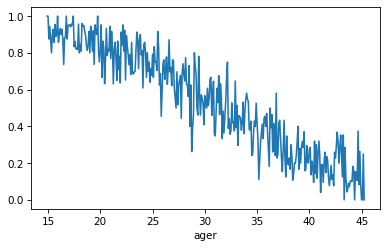

<IPython.core.display.Javascript object>

In [27]:
resp4["want_yes"] = resp4["rwant"] == 1
resp4.groupby("ager")["want_yes"].mean().plot()

In [28]:
# value_counts(resp4['nchildhh'])

<IPython.core.display.Javascript object>

In [29]:
value_counts(resp4["intent"])

intent
1    3354
2    4665
3     386
4      45
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [30]:
value_counts(resp4["addexp"])

addexp
0.0     4529
0.5       75
1.0     1311
1.5      222
2.0     1452
2.5      183
3.0      425
3.5       39
4.0      151
4.5        5
5.0       32
5.5        4
6.0       10
6.5        3
7.0        3
8.0        5
12.0       1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [31]:
value_counts(resp4["rmarital"])

rmarital
1    4031
2     412
3      59
4     687
5     344
6    2917
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [32]:
value_counts(resp4["marend01"])

marend01
1.0    1553
2.0     330
3.0     108
NaN    6459
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [33]:
resp4.fmarno.describe()

count    8450.000000
mean        0.761183
std         0.711908
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: fmarno, dtype: float64

<IPython.core.display.Javascript object>

In [34]:
resp4.fmarno.value_counts().sort_index()

fmarno
0    3160
1    4325
2     829
3     108
4      15
5      13
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [35]:
resp4.evrmarry.value_counts().sort_index()

evrmarry
False    3160
True     5290
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
resp4.separated.value_counts().sort_index()

separated
False    8120
True      330
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [37]:
resp4.head()

,finalwgt,ageint,currentcm,firstcm,cmintvw,cmbirth,marend01,cmdivorcx,cmstphsbx,fmarno,...,stillma,cycle,agemarry,ager,missing,year,age_index,agemarry_index,birth_index,want_yes
0,713792,28,NaN,NaN,1061,723,NaN,NaN,NaN,0,...,False,4,NaN,28.166667,False,60,28.0,NaN,60,True
1,367022,37,NaN,NaN,1059,614,NaN,NaN,NaN,0,...,False,4,NaN,37.083333,False,51,37.0,NaN,50,True
2,975924,21,NaN,NaN,1057,796,NaN,NaN,NaN,0,...,False,4,NaN,21.750000,False,66,21.0,NaN,60,True
3,587796,39,NaN,838.0,1057,581,1.0,943.0,NaN,1,...,False,4,21.416667,39.666667,False,48,39.0,21.0,40,False
4,719633,31,974.0,882.0,1062,683,1.0,930.0,NaN,2,...,False,4,16.583333,31.583333,False,56,31.0,16.0,50,True


<IPython.core.display.Javascript object>

In [38]:
sum(resp4.cmdivorcx.isnull()), 6897 + 77

(6974, 6974)

<IPython.core.display.Javascript object>

In [39]:
sum((resp4.cmdivorcx >= 685) & (resp4.cmdivorcx <= 1008)), 903 + 152

(1055, 1055)

<IPython.core.display.Javascript object>

In [40]:
sum((resp4.cmdivorcx >= 1009) & (resp4.cmdivorcx <= 1064)), 399 + 22

(421, 421)

<IPython.core.display.Javascript object>

In [41]:
sum(resp4.cmstphsbx.isnull()), 8113 + 29

(8142, 8142)

<IPython.core.display.Javascript object>

In [42]:
sum((resp4.cmstphsbx >= 685) & (resp4.cmstphsbx <= 1008)), 75 + 31

(106, 106)

<IPython.core.display.Javascript object>

In [43]:
sum((resp4.cmstphsbx >= 1009) & (resp4.cmstphsbx <= 1064)), 193 + 9

(202, 202)

<IPython.core.display.Javascript object>

In [44]:
sum(resp4.divorced)

1553

<IPython.core.display.Javascript object>

In [45]:
sum(~resp4.cmstphsbx.isnull())

308

<IPython.core.display.Javascript object>

In [46]:
sum(~resp4.cmdivorcx.isnull())

1476

<IPython.core.display.Javascript object>

## Cycle 5

Validating the 1995 data:

In [47]:
resp5 = marriage.ReadFemResp1995()
marriage.Validate1995(resp5)
resp5.shape

(10847, 33)

<IPython.core.display.Javascript object>

In [48]:
# value_counts(resp5['rwant'])

<IPython.core.display.Javascript object>

In [49]:
# value_counts(resp5['nchildhh'])

<IPython.core.display.Javascript object>

In [50]:
value_counts(resp5["intent"])

intent
1    4192
2    5924
3     597
4     134
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [51]:
value_counts(resp5["addexp"])

addexp
0.0     5791
0.5      132
1.0     1694
1.5      376
2.0     1649
2.5      300
3.0      538
3.5      104
4.0      168
4.5       20
5.0       40
5.5        2
6.0       17
6.5        4
7.0        4
7.5        1
8.0        4
8.5        1
9.0        1
10.0       1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [52]:
value_counts(resp5["rmarital"])

rmarital
1    5291
2     772
3      77
4     769
5     407
6    3531
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [53]:
value_counts(resp5["fmarno"])

fmarno
0    4003
1    5562
2    1077
3     174
4      26
5       5
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [54]:
value_counts(resp5["marend01"])

marend01
1.0    2073
2.0     354
3.0     110
NaN    8310
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [55]:
resp5.head()

,cmintvw,timesmar,cmmarrhx,cmbirth,finalwgt,marend01,cmdivorcx,cmstphsbx,marstat,fmarno,...,stillma,rwant,cycle,agemarry,ager,missing,year,age_index,agemarry_index,birth_index
0,1149,NaN,NaN,837,6776.3796,NaN,NaN,NaN,5,0,...,False,NaN,5,NaN,26.000000,False,69,26.0,NaN,60
1,1142,1.0,1024.0,781,841.8221,2.0,NaN,NaN,4,1,...,False,NaN,5,20.250000,30.083333,False,65,30.0,20.0,60
2,1145,NaN,NaN,907,3617.3637,NaN,NaN,NaN,5,0,...,False,NaN,5,NaN,19.833333,False,75,19.0,NaN,70
3,1145,1.0,1133.0,771,10788.1271,2.0,NaN,NaN,4,1,...,False,NaN,5,30.166667,31.166667,False,64,31.0,30.0,60
4,1144,NaN,NaN,927,5359.4150,NaN,NaN,NaN,5,0,...,False,NaN,5,NaN,18.083333,False,77,18.0,NaN,70


<IPython.core.display.Javascript object>

In [56]:
sum(resp5.cmdivorcx.isnull()), 9601 + 1 + 1 + 22

(9625, 9625)

<IPython.core.display.Javascript object>

In [57]:
sum((resp5.cmdivorcx >= 780) & (resp5.cmdivorcx <= 1092)), 1116

(1116, 1116)

<IPython.core.display.Javascript object>

In [58]:
sum((resp5.cmdivorcx >= 1093) & (resp5.cmdivorcx <= 1150)), 106

(106, 106)

<IPython.core.display.Javascript object>

In [59]:
sum(resp5.cmstphsbx.isnull()), 9601 + 1 + 15

(9617, 9617)

<IPython.core.display.Javascript object>

In [60]:
sum((resp5.cmstphsbx >= 780) & (resp5.cmstphsbx <= 1092)), 1167

(1167, 1167)

<IPython.core.display.Javascript object>

In [61]:
sum((resp5.cmstphsbx >= 1093) & (resp5.cmstphsbx <= 1150)), 63

(63, 63)

<IPython.core.display.Javascript object>

In [62]:
resp5.marend01.value_counts().sort_index()

marend01
1.0    2073
2.0     354
3.0     110
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [63]:
sum(resp5.divorced)

2073

<IPython.core.display.Javascript object>

In [64]:
sum(~resp5.cmstphsbx.isnull())

1230

<IPython.core.display.Javascript object>

In [65]:
sum(~resp5.cmdivorcx.isnull())

1222

<IPython.core.display.Javascript object>

In [66]:
sum((resp5.marend01 == 2) & (resp5.cmdivorcx.isnull()))

354

<IPython.core.display.Javascript object>

In [67]:
sum((resp5.marend01 == 3) & (resp5.cmdivorcx.isnull()))

110

<IPython.core.display.Javascript object>

In [68]:
sum((~resp5.divorced) & (~resp5.cmstphsbx.isnull()))

0

<IPython.core.display.Javascript object>

In [69]:
resp5.marstat.value_counts().sort_index()

marstat
1    5291
2      93
3    1008
4     452
5    4003
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [70]:
sum((resp5.marstat == 4) & (~resp5.divorced))  # separated and not divorced

360

<IPython.core.display.Javascript object>

In [71]:
sum((resp5.marstat == 4) & (~resp5.divorced) & (~resp5.cmstphsbx.isnull()))

0

<IPython.core.display.Javascript object>

## Cycle 6

Validating the 2002 data:

In [72]:
resp6 = marriage.ReadFemResp2002()
marriage.Validate2002(resp6)
resp6.shape

(7643, 33)

<IPython.core.display.Javascript object>

In [73]:
value_counts(resp6["hieduc"])

hieduc
1     1671
2       32
4     2171
5     1624
7      553
8     1171
9      295
10      92
11      34
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [74]:
# value_counts(resp6['nchildhh'])

<IPython.core.display.Javascript object>

In [75]:
value_counts(resp6["intent"])

intent
1    3628
2    3900
3     115
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [76]:
value_counts(resp6["addexp"])

addexp
0.0     3739
0.5       27
1.0     1443
1.5       26
2.0     1585
2.5        7
3.0      516
3.5        2
4.0      207
5.0       54
6.0       18
7.0        6
9.0        2
10.0       5
11.0       2
12.0       1
14.0       1
15.0       1
33.0       1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [77]:
value_counts(resp6["rmarital"])

rmarital
1    3080
2     732
3      49
4     557
5     279
6    2946
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [78]:
resp6.head()

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,rwant,hieduc,parity,agebaby1,rmarital,...,widowed,stillma,cycle,agemarry,ager,missing,year,age_index,agemarry_index,birth_index
0,2298,902,False,NaN,NaN,5.0,1,4,18.08,2,...,False,False,6,NaN,27.666667,False,75,27.0,NaN,70
1,5012,718,True,974.0,1077.0,5.0,5,1,22.75,1,...,False,False,6,21.333333,42.916667,False,59,42.0,21.0,50
2,11586,708,True,910.0,938.0,5.0,4,1,17.41,4,...,False,False,6,16.833333,43.833333,False,58,43.0,16.0,50
3,6794,1042,False,NaN,NaN,1.0,1,0,NaN,6,...,False,False,6,NaN,16.000000,False,86,16.0,NaN,80
4,616,991,False,NaN,NaN,1.0,1,0,NaN,6,...,False,False,6,NaN,20.166667,False,82,20.0,NaN,80


<IPython.core.display.Javascript object>

In [79]:
sum(resp6.cmdivorcx.isnull()), 6639 + 2 + 20

(6661, 6661)

<IPython.core.display.Javascript object>

In [80]:
sum((resp6.cmdivorcx >= 301) & (resp6.cmdivorcx <= 1164)), 607

(607, 607)

<IPython.core.display.Javascript object>

In [81]:
sum((resp6.cmdivorcx >= 1165) & (resp6.cmdivorcx <= 1239)), 375

(375, 375)

<IPython.core.display.Javascript object>

In [82]:
resp6.marend01.value_counts().sort_index()

marend01
1.0    1232
2.0     260
3.0      58
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [83]:
sum(resp6.divorced), sum(resp6.loc[resp6.divorced, "mar1diss"].isnull())

(1232, 0)

<IPython.core.display.Javascript object>

In [84]:
sum(resp6.separated), sum(resp6.loc[resp6.separated, "mar1diss"].isnull())

(260, 0)

<IPython.core.display.Javascript object>

In [85]:
sum(resp6.widowed), sum(resp6.loc[resp6.widowed, "mar1diss"].isnull())

(58, 0)

<IPython.core.display.Javascript object>

In [86]:
sum(resp6.stillma), sum(resp6.loc[resp6.stillma, "mar1diss"].isnull())

(2576, 0)

<IPython.core.display.Javascript object>

In [87]:
sum(resp6.evrmarry), 1232 + 260 + 58 + 2576

(4126, 4126)

<IPython.core.display.Javascript object>

## Cycle 7

Validating the 2010 data:

In [88]:
resp7 = marriage.ReadFemResp2010()
marriage.Validate2010(resp7)
resp7.shape

(12279, 34)

<IPython.core.display.Javascript object>

In [89]:
resp7.head()

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,rwant,rmarital,hieduc,nchildhh,parity,...,widowed,stillma,cycle,agemarry,ager,missing,year,age_index,agemarry_index,birth_index
0,34156,799,False,NaN,NaN,NaN,6,4,0,0,...,False,False,7,NaN,43.666667,False,66,43.0,NaN,60
1,40081,925,True,1314.0,NaN,1.0,1,9,0,0,...,False,True,7,32.416667,33.166667,False,77,33.0,32.0,70
2,32817,958,False,NaN,NaN,1.0,6,8,0,0,...,False,False,7,NaN,27.416667,False,79,27.0,NaN,70
3,39968,869,False,NaN,NaN,1.0,6,9,0,0,...,False,False,7,NaN,37.833333,False,72,37.0,NaN,70
4,27121,1004,False,NaN,NaN,1.0,6,5,0,0,...,False,False,7,NaN,23.416667,False,83,23.0,NaN,80


<IPython.core.display.Javascript object>

In [90]:
value_counts(resp7["hieduc"])

hieduc
1     3216
2      197
4     2982
5     2472
7      867
8     1853
9      543
10      87
11      62
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [91]:
value_counts(resp7["nchildhh"])

nchildhh
0    6155
1    2296
2    2284
3    1544
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [92]:
value_counts(resp7["intent"])

intent
1    6320
2    5780
3     179
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [93]:
value_counts(resp7["addexp"])

addexp
0.0     5524
0.5       46
1.0     2342
1.5       56
2.0     2732
2.5       15
3.0     1030
3.5        7
4.0      367
4.5        1
5.0       84
5.5        1
6.0       46
7.0        4
8.0        8
9.0        5
10.0       4
11.0       1
12.0       2
22.0       1
23.0       2
33.0       1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [94]:
sum(resp7.cmdivorcx.isnull()), 10705 + 1 + 19

(10730, 10725)

<IPython.core.display.Javascript object>

In [95]:
sum((resp7.cmdivorcx >= 522) & (resp7.cmdivorcx <= 1278)), 1286

(1281, 1286)

<IPython.core.display.Javascript object>

In [96]:
sum((resp7.cmdivorcx >= 1279) & (resp7.cmdivorcx <= 1290)), 106

(106, 106)

<IPython.core.display.Javascript object>

In [97]:
sum((resp7.cmdivorcx >= 1291) & (resp7.cmdivorcx <= 1308)), 112

(112, 112)

<IPython.core.display.Javascript object>

In [98]:
sum((resp7.cmdivorcx >= 1309) & (resp7.cmdivorcx <= 1326)), 50

(50, 50)

<IPython.core.display.Javascript object>

In [99]:
resp7.marend01.value_counts().sort_index()

marend01
1.0    1574
2.0     405
3.0      68
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [100]:
sum(resp7.divorced), sum(resp7.loc[resp7.divorced, "mar1diss"].isnull())

(1574, 0)

<IPython.core.display.Javascript object>

In [101]:
sum(resp7.separated), sum(resp7.loc[resp7.separated, "mar1diss"].isnull())

(405, 0)

<IPython.core.display.Javascript object>

In [102]:
sum(resp7.widowed), sum(resp7.loc[resp7.widowed, "mar1diss"].isnull())

(68, 0)

<IPython.core.display.Javascript object>

In [103]:
sum(resp7.stillma), sum(resp7.loc[resp7.stillma, "mar1diss"].isnull())

(3487, 0)

<IPython.core.display.Javascript object>

In [104]:
sum(resp7.evrmarry), 1574 + 405 + 68 + 3487

(5534, 5534)

<IPython.core.display.Javascript object>

## Validating the 2013 data

In [105]:
resp8 = marriage.ReadFemResp2013()
marriage.Validate2013(resp8)
resp8.shape

(5601, 34)

<IPython.core.display.Javascript object>

In [106]:
resp8.head()

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,rwant,rmarital,hieduc,nchildhh,parity,...,widowed,stillma,cycle,agemarry,ager,missing,year,age_index,agemarry_index,birth_index
0,50002,922,True,1303.0,NaN,1.0,5,5,1,1,...,False,False,8,31.750000,36.250000,False,76,36.0,31.0,70
1,50004,986,True,1215.0,1243.0,1.0,5,5,0,0,...,False,False,8,19.083333,29.750000,False,82,29.0,19.0,80
2,50005,1001,False,NaN,NaN,5.0,2,8,1,1,...,False,False,8,NaN,30.000000,False,83,30.0,NaN,80
3,50008,834,False,NaN,NaN,5.0,6,4,0,3,...,False,False,8,NaN,43.333333,False,69,43.0,NaN,60
4,50013,1127,False,NaN,NaN,1.0,6,5,0,0,...,False,False,8,NaN,19.750000,False,93,19.0,NaN,90


<IPython.core.display.Javascript object>

In [107]:
value_counts(resp8["hieduc"])

hieduc
1     1235
2       34
4     1488
5     1245
7      434
8      776
9      314
10      36
11      39
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [108]:
value_counts(resp8["nchildhh"])

nchildhh
0    2691
1    1112
2    1052
3     746
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [109]:
value_counts(resp8["intent"])

intent
1    2928
2    2605
3      68
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [110]:
value_counts(resp8["addexp"])

addexp
0.0     2494
0.5       21
1.0     1131
1.5       22
2.0     1257
2.5        5
3.0      443
3.5        2
4.0      161
5.0       43
6.0       17
7.0        2
8.0        1
10.0       1
11.0       1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [111]:
sum(resp8.cmdivorcx.isnull()), 4851 + 2 + 24

(4877, 4877)

<IPython.core.display.Javascript object>

In [112]:
sum((resp8.cmdivorcx >= 380) & (resp8.cmdivorcx <= 1340)), 658

(658, 658)

<IPython.core.display.Javascript object>

In [113]:
sum((resp8.cmdivorcx >= 1341) & (resp8.cmdivorcx <= 1352)), 48

(48, 48)

<IPython.core.display.Javascript object>

In [114]:
sum((resp8.cmdivorcx >= 1353) & (resp8.cmdivorcx <= 1365)), 18

(18, 18)

<IPython.core.display.Javascript object>

In [115]:
resp8.marend01.value_counts().sort_index()

marend01
1.0    755
2.0    214
3.0     26
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [116]:
sum(resp8.divorced), sum(resp8.loc[resp8.divorced, "mar1diss"].isnull())

(755, 0)

<IPython.core.display.Javascript object>

In [117]:
sum(resp8.separated), sum(resp8.loc[resp8.separated, "mar1diss"].isnull())

(214, 0)

<IPython.core.display.Javascript object>

In [118]:
sum(resp8.widowed), sum(resp8.loc[resp8.widowed, "mar1diss"].isnull())

(26, 0)

<IPython.core.display.Javascript object>

In [119]:
sum(resp8.stillma), sum(resp8.loc[resp8.stillma, "mar1diss"].isnull())

(1457, 0)

<IPython.core.display.Javascript object>

In [120]:
sum(resp8.evrmarry), 755 + 214 + 26 + 1457

(2452, 2452)

<IPython.core.display.Javascript object>

## Validating the 2015 data

In [121]:
from marriage import ReadFemResp2015

resp9 = ReadFemResp2015()
marriage.Validate2015(resp9)
resp9.shape

(5699, 34)

<IPython.core.display.Javascript object>

In [122]:
resp9.head()

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,rwant,rmarital,hieduc,nchildhh,parity,...,widowed,stillma,cycle,agemarry,ager,missing,year,age_index,agemarry_index,birth_index
0,60418,921,True,1159.0,1269.0,5.0,2,4,1,3,...,False,False,9,19.833333,38.333333,False,76,38.0,19.0,70
1,60419,942,True,1207.0,1253.0,1.0,2,7,1,0,...,False,False,9,22.083333,37.166667,False,78,37.0,22.0,70
2,60420,981,False,NaN,NaN,1.0,6,5,1,1,...,False,False,9,NaN,33.916667,False,81,33.0,NaN,80
3,60423,1010,False,NaN,NaN,5.0,6,5,2,2,...,False,False,9,NaN,31.416667,False,84,31.0,NaN,80
4,60426,897,True,1256.0,NaN,5.0,1,9,1,1,...,False,True,9,29.916667,39.250000,False,74,39.0,29.0,70


<IPython.core.display.Javascript object>

In [123]:
value_counts(resp9["hieduc"])

hieduc
1     1240
2       33
4     1428
5     1229
7      440
8      853
9      373
10      50
11      53
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [124]:
value_counts(resp9["nchildhh"])

nchildhh
0    2870
1    1116
2     994
3     719
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [125]:
value_counts(resp9["intent"])

intent
1    2935
2    2680
3      84
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [126]:
value_counts(resp9["addexp"])

addexp
0.0     2550
0.5       23
1.0     1168
1.5       21
2.0     1313
2.5        8
3.0      421
4.0      137
5.0       38
6.0        9
7.0        3
8.0        1
10.0       3
12.0       2
13.0       1
22.0       1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [127]:
sum(resp9.cmdivorcx.isnull()), 4946 + 3 + 18

(4967, 4967)

<IPython.core.display.Javascript object>

In [128]:
sum((resp9.cmdivorcx >= 378) & (resp9.cmdivorcx <= 1340)), 563

(563, 563)

<IPython.core.display.Javascript object>

In [129]:
sum((resp9.cmdivorcx >= 1341) & (resp9.cmdivorcx <= 1352)), 56

(56, 56)

<IPython.core.display.Javascript object>

In [130]:
sum((resp9.cmdivorcx >= 1353) & (resp9.cmdivorcx <= 1364)), 48

(48, 48)

<IPython.core.display.Javascript object>

In [131]:
sum((resp9.cmdivorcx >= 1365) & (resp9.cmdivorcx <= 1376)), 46

(46, 46)

<IPython.core.display.Javascript object>

In [132]:
sum((resp9.cmdivorcx >= 1377) & (resp9.cmdivorcx <= 1389)), 19

(19, 19)

<IPython.core.display.Javascript object>

In [133]:
resp9.marend01.value_counts().sort_index()

marend01
1.0    756
2.0    169
3.0     28
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [134]:
sum(resp9.divorced), sum(resp9.loc[resp9.divorced, "mar1diss"].isnull())

(756, 0)

<IPython.core.display.Javascript object>

In [135]:
sum(resp9.separated), sum(resp9.loc[resp9.separated, "mar1diss"].isnull())

(169, 0)

<IPython.core.display.Javascript object>

In [136]:
sum(resp9.widowed), sum(resp9.loc[resp9.widowed, "mar1diss"].isnull())

(28, 0)

<IPython.core.display.Javascript object>

In [137]:
sum(resp9.stillma), sum(resp9.loc[resp9.stillma, "mar1diss"].isnull())

(1448, 0)

<IPython.core.display.Javascript object>

In [138]:
sum(resp9.evrmarry), 756 + 169 + 28 + 1448

(2401, 2401)

<IPython.core.display.Javascript object>

## Validating 2017 data

In [139]:
resp10 = marriage.ReadFemResp2017()
marriage.Validate2017(resp10)

<IPython.core.display.Javascript object>

In [140]:
value_counts(resp10["hieduc"])

hieduc
1     1123
2       25
4     1419
5     1102
7      432
8      943
9      409
10      49
11      52
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [141]:
value_counts(resp10["nchildhh"])

nchildhh
0    2857
1    1080
2    1018
3     599
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [142]:
value_counts(resp10["intent"])

intent
1    2514
2    2966
3      74
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [143]:
value_counts(resp10["addexp"])

addexp
0.0     2865
0.5       23
1.0     1003
1.5       18
2.0     1060
2.5        4
3.0      381
4.0      136
5.0       40
6.0       13
7.0        3
8.0        1
9.0        2
10.0       1
11.0       2
14.0       1
33.0       1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [144]:
value_counts(resp10["marend01"])

marend01
1.0     818
2.0     166
3.0      55
NaN    4515
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [145]:
resp10["cmdivorcx"].describe()

count     818.000000
mean     1255.334963
std        93.168345
min       978.000000
25%      1182.000000
50%      1278.000000
75%      1338.000000
max      1410.000000
Name: cmdivorcx, dtype: float64

<IPython.core.display.Javascript object>

In [146]:
resp10.shape

(5554, 33)

<IPython.core.display.Javascript object>

In [147]:
sum(resp10.evrmarry)

2582

<IPython.core.display.Javascript object>

In [148]:
resp10.agemarry.value_counts().max()

29

<IPython.core.display.Javascript object>

In [149]:
resp10.head()

,caseid,evrmarry,rwant,ager,rmarital,hieduc,nchildhh,parity,agebaby1,fmarno,...,cmbirth,cmmarrhx,cmdivorcx,cycle,agemarry,missing,year,age_index,agemarry_index,birth_index
0,70623,False,1.0,16,6,1,0,0,NaN,0,...,1204,NaN,NaN,10,NaN,False,100,16.0,NaN,100
1,70624,True,1.0,40,4,8,0,0,NaN,1,...,920,1254.0,1290.0,10,27.833333,False,76,40.0,27.0,70
2,70625,False,5.0,15,6,1,0,0,NaN,0,...,1228,NaN,NaN,10,NaN,False,102,15.0,NaN,100
3,70627,True,5.0,35,1,8,2,2,29.0,1,...,980,1302.0,NaN,10,26.833333,False,81,35.0,26.0,80
4,70628,True,1.0,28,1,7,3,3,18.0,1,...,1079,1326.0,NaN,10,20.583333,False,89,28.0,20.0,80


<IPython.core.display.Javascript object>

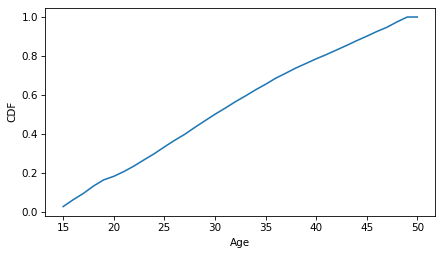

<IPython.core.display.Javascript object>

In [150]:
Cdf.from_seq(resp10.ager).plot()
decorate(xlabel="Age", ylabel="CDF")

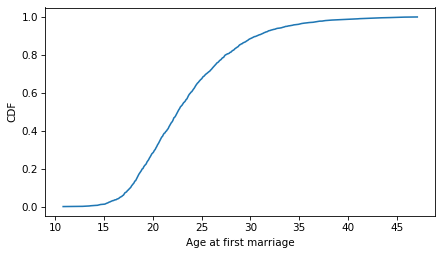

<IPython.core.display.Javascript object>

In [151]:
Cdf.from_seq(resp10.agemarry).plot()
decorate(xlabel="Age at first marriage", ylabel="CDF")

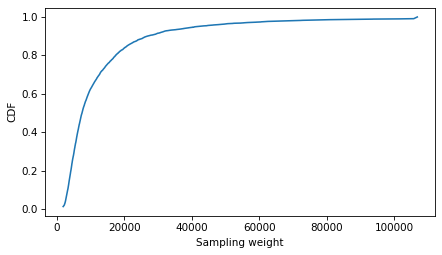

<IPython.core.display.Javascript object>

In [152]:
Cdf.from_seq(resp10.finalwgt).plot()
decorate(xlabel="Sampling weight", ylabel="CDF")

## Validating 2019 data

In [153]:
from marriage import ReadFemResp2019

resp11 = ReadFemResp2019()
marriage.Validate2019(resp11)
resp11.shape

(6141, 33)

<IPython.core.display.Javascript object>

In [154]:
value_counts(resp11["hieduc"])

hieduc
1     1137
2       31
4     1614
5     1227
7      512
8     1072
9      445
10      60
11      43
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [155]:
value_counts(resp11["nchildhh"])

nchildhh
0    3300
1    1117
2    1066
3     658
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [156]:
value_counts(resp11["intent"])

intent
1    2720
2    3324
3      97
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [157]:
value_counts(resp11["addexp"])

addexp
0.0     3229
0.5       23
1.0     1069
1.5       35
2.0     1149
2.5        6
3.0      446
3.5        1
4.0      134
5.0       31
6.0       10
6.5        2
7.0        3
10.0       3
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [158]:
value_counts(resp11["marend01"])

marend01
1.0     873
2.0     177
3.0      45
NaN    5046
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [159]:
resp11["cmdivorcx"].describe()

count     873.000000
mean     1281.587629
std        88.792793
min      1002.000000
25%      1218.000000
50%      1290.000000
75%      1350.000000
max      1434.000000
Name: cmdivorcx, dtype: float64

<IPython.core.display.Javascript object>

In [160]:
sum(resp11.evrmarry)

2722

<IPython.core.display.Javascript object>

In [161]:
resp11.agemarry.value_counts().max()

29

<IPython.core.display.Javascript object>

In [162]:
resp11.head()

,caseid,evrmarry,rwant,ager,rmarital,hieduc,nchildhh,parity,agebaby1,fmarno,...,cmbirth,cmmarrhx,cmdivorcx,cycle,agemarry,missing,year,age_index,agemarry_index,birth_index
0,80716,False,1.0,35,6,8,0,0,NaN,0,...,1016,NaN,NaN,11,NaN,False,84,35.0,NaN,80
1,80718,False,1.0,30,6,8,0,0,NaN,0,...,1059,NaN,NaN,11,NaN,False,88,30.0,NaN,80
2,80719,False,5.0,30,6,4,3,5,17.0,0,...,1071,NaN,NaN,11,NaN,False,89,30.0,NaN,80
3,80720,True,1.0,32,1,8,2,2,25.0,1,...,1055,1326.0,NaN,11,22.583333,False,87,32.0,22.0,80
4,80723,True,5.0,27,4,4,3,3,20.0,1,...,1104,1338.0,1398.0,11,19.500000,False,91,27.0,19.0,90


<IPython.core.display.Javascript object>

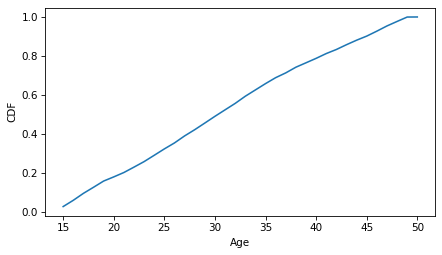

<IPython.core.display.Javascript object>

In [163]:
Cdf.from_seq(resp11.ager).plot()
decorate(xlabel="Age", ylabel="CDF")

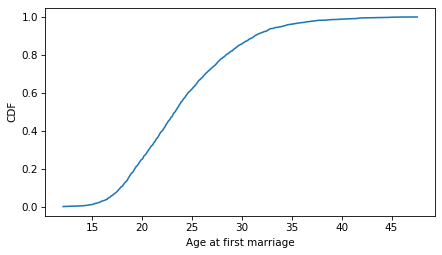

<IPython.core.display.Javascript object>

In [164]:
Cdf.from_seq(resp11.agemarry).plot()
decorate(xlabel="Age at first marriage", ylabel="CDF")

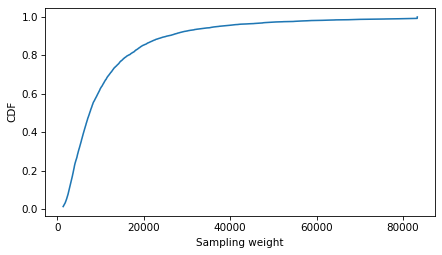

<IPython.core.display.Javascript object>

In [165]:
Cdf.from_seq(resp11.finalwgt).plot()
decorate(xlabel="Sampling weight", ylabel="CDF")

In [166]:
value_counts(resp11["intent"])

intent
1    2720
2    3324
3      97
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [167]:
value_counts(resp11["addexp"])

addexp
0.0     3229
0.5       23
1.0     1069
1.5       35
2.0     1149
2.5        6
3.0      446
3.5        1
4.0      134
5.0       31
6.0       10
6.5        2
7.0        3
10.0       3
Name: count, dtype: int64

<IPython.core.display.Javascript object>

## Validating 2023 data


In [168]:
from marriage import ReadFemResp2023

resp12 = ReadFemResp2023()
resp12.columns

Index(['evrmarry', 'rwant', 'ager', 'rmarital', 'hieduc', 'nchildhh', 'parity',
       'agebaby1', 'fmarno', 'mardat01', 'marend01', 'mardis01', 'strloper',
       'intent', 'addexp', 'finalwgt', 'cmintvw', 'anycoll', 'divorced',
       'separated', 'widowed', 'stillma', 'cmbirth', 'cmmarrhx', 'cmdivorcx',
       'cycle', 'agemarry', 'missing', 'year', 'age_index', 'agemarry_index',
       'birth_index'],
      dtype='object')

<IPython.core.display.Javascript object>

In [169]:
value_counts(resp12["hieduc"])

hieduc
1.0      623
2.0      169
3.0      153
4.0      807
5.0      956
6.0      353
7.0      282
8.0     1267
9.0      752
10.0     135
11.0      89
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [170]:
for col in resp12.columns:
    if "baby" in col:
        print(col)

agebaby1


<IPython.core.display.Javascript object>

In [171]:
value_counts(resp12["parity"])

parity
0.0     2833
1.0      931
2.0     1009
3.0      488
4.0      202
5.0       65
6.0       31
7.0       12
8.0        5
9.0        6
11.0       2
12.0       2
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [172]:
value_counts(resp12["nchildhh"])

nchildhh
0.0    3227
1.0     947
2.0     914
3.0     498
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [173]:
value_counts(resp12["intent"])

intent
1.0    1888
2.0    3593
3.0      88
4.0      17
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [174]:
value_counts(resp12["addexp"])

addexp
0.0     3634
0.5       20
1.0      656
1.5       17
2.0      869
2.5        3
3.0      286
4.0       76
4.5        1
5.0       13
6.0        3
7.0        2
8.0        4
9.0        1
11.0       1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [175]:
resp12["evrmarry"].value_counts()

evrmarry
False    3024
True     2562
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [176]:
resp12["marend01"].value_counts()

marend01
1.0    631
2.0     85
3.0     27
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [177]:
resp12["fmarno"].value_counts()

fmarno
0.0    3024
1.0    2237
2.0     274
3.0      45
4.0       4
5.0       2
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [178]:
resp12["fmarno"].value_counts()

fmarno
0.0    3024
1.0    2237
2.0     274
3.0      45
4.0       4
5.0       2
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [179]:
resp12["ager"].value_counts()

ager
32.0    227
33.0    217
30.0    206
31.0    198
35.0    190
38.0    189
37.0    189
29.0    183
41.0    181
39.0    180
34.0    180
36.0    180
40.0    178
27.0    176
18.0    170
19.0    162
28.0    160
42.0    152
43.0    152
25.0    147
45.0    145
17.0    142
49.0    140
47.0    138
26.0    137
48.0    135
44.0    135
46.0    134
15.0    132
20.0    127
24.0    126
16.0    124
22.0    124
23.0    116
21.0    113
50.0      1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [180]:
resp12["mardat01"].value_counts()

mardat01
2016.0    145
2013.0    130
2014.0    127
2010.0    126
2012.0    125
2019.0    119
2008.0    116
2015.0    115
2017.0    114
2009.0    110
2020.0    110
2021.0    108
2007.0    104
2018.0     99
2011.0     90
2022.0     87
2006.0     82
2005.0     81
2004.0     67
2003.0     61
2001.0     58
1999.0     51
2002.0     51
2000.0     48
1998.0     42
1996.0     31
1997.0     30
1994.0     24
1993.0     22
2023.0     22
1995.0     20
1992.0     14
1991.0      9
1990.0      3
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [181]:
resp12["mardis01"].value_counts()

mardis01
2019.0    49
2018.0    47
2016.0    46
2011.0    36
2022.0    35
2014.0    34
2020.0    34
2009.0    34
2010.0    33
2012.0    32
2015.0    31
2021.0    30
2017.0    28
2013.0    27
2008.0    24
2004.0    23
2005.0    21
2007.0    20
2001.0    20
2000.0    19
2003.0    18
1999.0    16
2006.0    14
1998.0    11
1997.0    11
2023.0    11
2002.0    11
1996.0     8
1994.0     5
1993.0     4
9997.0     4
1995.0     4
1992.0     2
1990.0     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [182]:
value_counts(resp12["marend01"])

marend01
1.0     631
2.0      85
3.0      27
NaN    4843
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [183]:
resp12["cmdivorcx"].describe()

count      631.000000
mean      1788.123613
std       6598.278385
min       1086.000000
25%       1266.000000
50%       1350.000000
75%       1410.000000
max      97170.000000
Name: cmdivorcx, dtype: float64

<IPython.core.display.Javascript object>

In [184]:
sum(resp12.evrmarry)

2562

<IPython.core.display.Javascript object>

In [185]:
resp12.agemarry.value_counts().max()

41

<IPython.core.display.Javascript object>

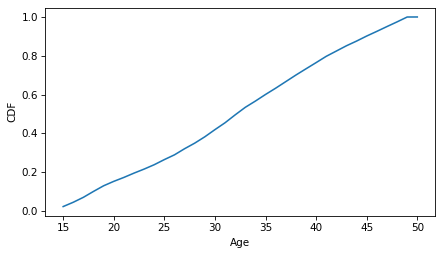

<IPython.core.display.Javascript object>

In [186]:
Cdf.from_seq(resp12.ager).plot()
decorate(xlabel="Age", ylabel="CDF")

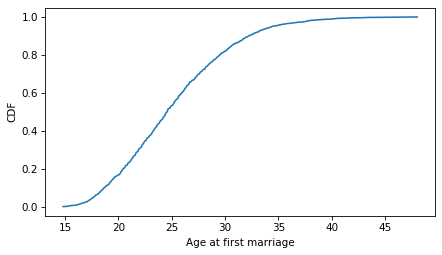

<IPython.core.display.Javascript object>

In [187]:
Cdf.from_seq(resp12.agemarry).plot()
decorate(xlabel="Age at first marriage", ylabel="CDF")

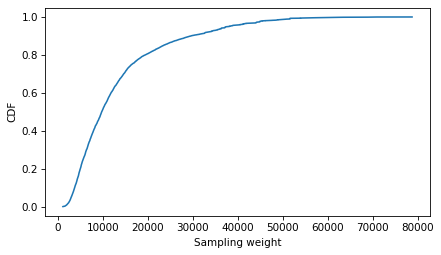

<IPython.core.display.Javascript object>

In [188]:
Cdf.from_seq(resp12.finalwgt).plot()
decorate(xlabel="Sampling weight", ylabel="CDF")

## Concatenate the data

Make a list of DataFrames, one for each cycle:

In [189]:
resps = [resp12, resp11, resp10, resp9, resp8, resp7, resp6, resp5, resp4, resp3]
# resps = [resp11]

<IPython.core.display.Javascript object>

Make a table showing the number of respondents in each cycle:

In [190]:
def SummarizeCycle(df):
    ages = df.ager.min(), df.ager.max()
    ages = np.array(ages)

    intvws = df.cmintvw.min(), df.cmintvw.max()
    intvws = np.array(intvws) / 12 + 1900

    births = df.cmbirth.min(), df.cmbirth.max()
    births = np.array(births) / 12 + 1900

    print("# & ", intvws.astype(int), "&", len(df), "&", births.astype(int), r"\\")


for resp in reversed(resps):
    SummarizeCycle(resp)

# &  [1982 1983] & 7969 & [1937 1968] \\
# &  [1988 1988] & 8450 & [1943 1973] \\
# &  [1995 1995] & 10847 & [1950 1980] \\
# &  [2002 2003] & 7643 & [1957 1988] \\
# &  [2006 2010] & 12279 & [1961 1995] \\
# &  [2011 2013] & 5601 & [1966 1998] \\
# &  [2013 2015] & 5699 & [1968 2000] \\
# &  [2015 2017] & 5554 & [1966 2003] \\
# &  [2017 2019] & 6141 & [1969 2005] \\
# &  [2022 2024] & 5586 & [1973 2009] \\


<IPython.core.display.Javascript object>

Check for missing values in `agemarry`:

In [191]:
def CheckAgeVars(df):
    print(sum(df[df.evrmarry].agemarry.isnull()))


for resp in resps:
    CheckAgeVars(resp)

21
0
0
11
17
16
37
0
22
0


<IPython.core.display.Javascript object>

Combine the DataFrames (but remember that this is not resampled properly):

In [192]:
df = pd.concat(resps, ignore_index=True, sort=False)
len(df)

75769

<IPython.core.display.Javascript object>

```
1 CURRENTLY MARRIED 3971
2 NOT MARRIED BUT LIVING WITH OPP SEX PARTNER 1451
3 WIDOWED 43
4 DIVORCED 786
5 SEPARATED FOR REASONS OF MARITAL DISCORD 431
6 NEVER BEEN MARRIED 5597
```

In [193]:
pd.crosstab(df["anycoll"], df["cycle"], dropna=False)

cycle,3,4,5,6,7,8,9,10,11,12
anycoll,,,,,,,,,,
False,5263,4999,6158,3874,6395,2757,2701,2567,2782,1752
True,2706,3451,4689,3769,5884,2844,2998,2987,3359,3834


<IPython.core.display.Javascript object>

In [194]:
pd.crosstab(df["educat"], df["cycle"], dropna=False)

cycle,3,4,5,6,7,8,9,10,11,12
educat,,,,,,,,,,
0.0,4,3,0,0,0,0,0,0,0,0
1.0,2,1,0,0,0,0,0,0,0,0
2.0,2,12,0,0,0,0,0,0,0,0
3.0,6,9,0,0,0,0,0,0,0,0
4.0,16,6,0,0,0,0,0,0,0,0
5.0,14,12,0,0,0,0,0,0,0,0
6.0,40,48,0,0,0,0,0,0,0,0
7.0,67,73,0,0,0,0,0,0,0,0
8.0,237,246,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [195]:
pd.crosstab(df["hieduc"], df["cycle"], dropna=False)

cycle,3,4,5,6,7,8,9,10,11,12
hieduc,,,,,,,,,,
1.0,0,0,2251,1671,3216,1235,1240,1123,1137,623
2.0,0,0,42,32,197,34,33,25,31,169
3.0,0,0,0,0,0,0,0,0,0,153
4.0,0,0,3865,2171,2982,1488,1428,1419,1614,807
5.0,0,0,2048,1624,2472,1245,1229,1102,1227,956
6.0,0,0,0,0,0,0,0,0,0,353
7.0,0,0,656,553,867,434,440,432,512,282
8.0,0,0,1553,1171,1853,776,853,943,1072,1267
9.0,0,0,349,295,543,314,373,409,445,752


<IPython.core.display.Javascript object>

In [196]:
pd.crosstab(df["addexp"], df["cycle"], dropna=False)

cycle,3,4,5,6,7,8,9,10,11,12
addexp,,,,,,,,,,
0.0,3566,4529,5791,3739,5524,2494,2550,2865,3229,3634
0.5,63,75,132,27,46,21,23,23,23,20
1.0,1393,1311,1694,1443,2342,1131,1168,1003,1069,656
1.5,197,222,376,26,56,22,21,18,35,17
2.0,1579,1452,1649,1585,2732,1257,1313,1060,1149,869
2.5,229,183,300,7,15,5,8,4,6,3
3.0,534,425,538,516,1030,443,421,381,446,286
3.5,78,39,104,2,7,2,0,0,1,0
4.0,221,151,168,207,367,161,137,136,134,76


<IPython.core.display.Javascript object>

In [197]:
pd.crosstab(df["agebaby1"], df["cycle"], dropna=False)

cycle,3,4,5,6,7,8,9,10,11,12
agebaby1,,,,,,,,,,
8.25,0,0,0,0,1,0,1,0,0,0
10.25,0,0,0,0,0,0,1,0,0,0
10.66,0,0,0,0,1,0,0,0,0,0
10.75,1,0,0,0,0,0,0,0,0,0
10.83,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
44.41,0,0,0,0,1,0,0,0,0,0
45.00,0,0,0,0,0,0,0,0,0,3
46.00,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [198]:
df.groupby("cycle")["agebaby1"].describe()

,count,mean,std,min,25%,50%,75%,max
cycle,,,,,,,,
3,4607.0,21.071450,4.001623,10.75,18.17,20.33,23.33,42.67
4,5328.0,21.927399,4.395177,11.92,18.73,21.08,24.67,41.08
5,6911.0,22.691519,4.897003,12.67,18.92,21.75,25.75,43.17
6,4413.0,23.084414,5.291378,10.83,18.91,21.91,26.58,43.00
7,6683.0,22.829473,5.259124,8.25,18.91,21.41,26.16,44.41
8,3141.0,22.828096,5.147017,11.50,18.91,21.58,26.08,42.66
9,3067.0,23.205214,5.411473,8.25,19.08,21.91,26.75,42.58
10,3150.0,23.149524,5.654287,12.00,19.00,22.00,27.00,44.00
11,3315.0,23.244646,5.612636,11.00,19.00,22.00,27.00,46.00


<IPython.core.display.Javascript object>

In [199]:
pd.crosstab(df["intent"], df["cycle"], dropna=False)

cycle,3,4,5,6,7,8,9,10,11,12
intent,,,,,,,,,,
1.0,3937,3354,4192,3628,6320,2928,2935,2514,2720,1888
2.0,3673,4665,5924,3900,5780,2605,2680,2966,3324,3593
3.0,359,386,597,115,179,68,84,74,97,88
4.0,0,45,134,0,0,0,0,0,0,17


<IPython.core.display.Javascript object>

In [200]:
pd.crosstab(df["strloper"], df["cycle"], dropna=False)

cycle,3,4,5,6,7,8,9,10,11,12
strloper,,,,,,,,,,
1.0,1112,1636,0,1067,1609,733,692,748,805,478
2.0,391,404,0,213,205,93,92,169,182,120
3.0,301,502,0,308,466,182,152,186,219,277
4.0,34,46,2585,31,45,17,22,26,27,54
5.0,6131,5862,8262,6024,9954,4576,4741,4425,4908,4657


<IPython.core.display.Javascript object>

In [201]:
pd.crosstab(df["parity"], df["cycle"], dropna=False)

cycle,3,4,5,6,7,8,9,10,11,12
parity,,,,,,,,,,
0.0,3356,3122,3936,3230,5596,2460,2632,2404,2826,2833
1.0,1448,1559,2072,1519,2214,1043,1040,1011,1039,931
2.0,1605,2109,2654,1603,2360,1100,1057,1159,1201,1009
3.0,895,1040,1418,828,1313,640,621,626,670,488
4.0,373,364,518,309,496,232,228,243,262,202
5.0,154,162,156,95,181,86,82,67,79,65
6.0,83,58,51,29,74,23,22,25,44,31
7.0,29,23,21,15,26,12,11,13,10,12
8.0,17,10,15,8,8,3,4,3,6,5


<IPython.core.display.Javascript object>

In [202]:
pd.crosstab(df["fmarno"], df["cycle"], dropna=False)

cycle,3,4,5,6,7,8,9,10,11,12
fmarno,,,,,,,,,,
0.0,3318,3160,4003,3517,6745,3149,3298,2972,3419,3024
1.0,3953,4325,5562,3436,4788,2076,2037,2156,2293,2237
2.0,612,829,1077,582,631,332,317,357,356,274
3.0,77,108,174,90,103,34,37,55,61,45
4.0,5,15,26,15,8,9,9,10,12,4
5.0,2,13,5,3,3,1,1,2,0,2
6.0,0,0,0,0,1,0,0,2,0,0
8.0,2,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [203]:
pd.crosstab(df["evrmarry"], df["cycle"])

cycle,3,4,5,6,7,8,9,10,11,12
evrmarry,,,,,,,,,,
False,3318,3160,4006,3517,6745,3149,3298,2972,3419,3024
True,4651,5290,6841,4126,5534,2452,2401,2582,2722,2562


<IPython.core.display.Javascript object>

In [204]:
pd.crosstab(df["marend01"], df["cycle"])

cycle,3,4,5,6,7,8,9,10,11,12
marend01,,,,,,,,,,
1.0,1122,1553,2073,1232,1574,755,756,818,873,631
2.0,394,330,354,260,405,214,169,166,177,85
3.0,119,108,110,58,68,26,28,55,45,27


<IPython.core.display.Javascript object>

In [205]:
df.groupby("cycle")["ager"].describe()

,count,mean,std,min,25%,50%,75%,max
cycle,,,,,,,,
3,7969.0,27.708454,8.181847,15.000000,20.250000,27.000000,34.000000,45.000000
4,8450.0,30.035089,8.130994,14.916667,23.416667,30.250000,36.666667,45.250000
5,10847.0,31.090686,8.303936,14.833333,24.333333,31.916667,38.000000,45.500000
6,7643.0,30.001592,8.433760,15.000000,22.833333,30.000000,37.166667,45.000000
7,12279.0,29.136622,8.451631,15.000000,21.916667,28.666667,36.166667,45.083333
8,5601.0,29.104133,8.375936,15.000000,21.916667,28.833333,35.916667,45.083333
9,5699.0,29.379423,8.405552,15.000000,22.416667,29.166667,36.083333,45.166667
10,5554.0,31.016745,9.886329,15.000000,23.000000,30.000000,39.000000,50.000000
11,6141.0,31.147044,9.749085,15.000000,23.000000,31.000000,39.000000,50.000000


<IPython.core.display.Javascript object>

In [206]:
df.groupby("cycle")["cmmarrhx"].describe()

,count,mean,std,min,25%,50%,75%,max
cycle,,,,,,,,
3,4651.0,857.943883,83.893561,626.0,800.00,863.0,927.0,997.0
4,5268.0,911.531131,84.646230,685.0,845.00,915.0,981.0,1062.0
5,6844.0,993.719608,85.862666,780.0,924.00,997.0,1066.0,1149.0
6,4089.0,1102.219124,84.454045,871.0,1042.00,1110.0,1173.0,1236.0
7,5520.0,1174.797826,82.526545,920.0,1115.75,1183.0,1243.0,1324.0
8,2435.0,1226.575359,78.826596,999.0,1175.00,1232.0,1291.0,1363.0
9,2390.0,1249.898745,78.903270,1026.0,1195.00,1256.0,1316.0,1388.0
10,2582.0,1246.838110,100.573347,966.0,1170.00,1254.0,1326.0,1410.0
11,2722.0,1273.238795,97.275836,990.0,1206.00,1290.0,1350.0,1434.0


<IPython.core.display.Javascript object>

In [207]:
df.groupby("cycle")["cmintvw"].describe()

,count,mean,std,min,25%,50%,75%,max
cycle,,,,,,,,
3,7969.0,994.452252,1.416700,992.0,993.0,994.0,995.0,1000.0
4,8450.0,1059.450888,1.548602,1057.0,1058.0,1059.0,1060.0,1064.0
5,10847.0,1143.968471,2.024495,1141.0,1142.0,1143.0,1145.0,1150.0
6,7643.0,1232.783200,2.978545,1225.0,1231.0,1233.0,1235.0,1239.0
7,12279.0,1302.753644,14.213140,1278.0,1290.0,1303.0,1315.0,1326.0
8,5601.0,1352.992144,6.762999,1341.0,1347.0,1353.0,1359.0,1365.0
9,5699.0,1377.168451,6.864101,1365.0,1372.0,1377.0,1383.0,1389.0
10,5554.0,1400.902413,6.971852,1389.0,1395.0,1401.0,1407.0,1413.0
11,6141.0,1424.813223,7.065362,1413.0,1419.0,1425.0,1431.0,1437.0


<IPython.core.display.Javascript object>

In [208]:
df.groupby("cycle")["cmbirth"].describe()

,count,mean,std,min,25%,50%,75%,max
cycle,,,,,,,,
3,7969.0,661.950809,98.310000,453.0,586.00,671.0,753.0,817.0
4,8450.0,699.029822,97.634489,519.0,620.00,697.0,778.0,879.0
5,10847.0,770.880243,99.639469,604.0,688.00,762.0,852.0,963.0
6,7643.0,872.764098,101.161818,688.0,787.00,873.0,959.5,1058.0
7,12279.0,953.114179,102.338992,740.0,869.00,959.0,1040.0,1143.0
8,5601.0,1003.742546,100.504478,803.0,923.00,1008.0,1090.0,1182.0
9,5699.0,1024.615371,101.047116,826.0,944.00,1027.0,1108.5,1206.0
10,5554.0,1034.701476,118.986717,802.0,940.00,1041.0,1132.0,1239.0
11,6141.0,1057.048689,117.232379,831.0,964.00,1062.0,1152.0,1262.0


<IPython.core.display.Javascript object>

In [209]:
df.groupby("cycle")["cmdivorcx"].describe()

,count,mean,std,min,25%,50%,75%,max
cycle,,,,,,,,
3,1037.0,906.558341,64.808894,654.0,870.00,919.0,957.00,994.0
4,1476.0,958.396341,69.049867,718.0,915.00,967.0,1014.00,1061.0
5,1222.0,999.819149,68.071306,791.0,949.00,1001.0,1052.00,1141.0
6,982.0,1123.318737,77.818952,909.0,1066.25,1137.0,1190.00,1237.0
7,1549.0,1201.541640,76.631331,960.0,1152.00,1213.0,1265.00,1325.0
8,724.0,1254.817680,72.821595,1038.0,1205.00,1267.0,1316.25,1363.0
9,732.0,1281.019126,70.487590,1063.0,1236.00,1295.0,1338.00,1387.0
10,818.0,1255.334963,93.168345,978.0,1182.00,1278.0,1338.00,1410.0
11,873.0,1281.587629,88.792793,1002.0,1218.00,1290.0,1350.00,1434.0


<IPython.core.display.Javascript object>

Double check missing data:

In [210]:
sum(df.missing)

124

<IPython.core.display.Javascript object>

Generate a table with the number of respondents in each cohort:

In [211]:
marriage.digitize_resp(df)
grouped = df.groupby("birth_index")
for name, group in iter(grouped):
    print(
        name,
        "&",
        len(group),
        "&",
        int(group.ager.min()),
        "--",
        int(group.age_index.max()),
        "&",
        len(group[group.evrmarry]),
        "&",
        sum(group.missing),
        r"\\",
    )

30 & 325 & 42 -- 45 & 310 & 0 \\
40 & 3608 & 32 -- 45 & 3287 & 9 \\
50 & 10631 & 22 -- 45 & 8667 & 18 \\
60 & 14953 & 15 -- 50 & 8809 & 33 \\
70 & 17234 & 14 -- 50 & 9747 & 40 \\
80 & 16040 & 14 -- 44 & 6577 & 21 \\
90 & 10324 & 15 -- 34 & 1711 & 2 \\
100 & 2654 & 15 -- 24 & 53 & 1 \\


<IPython.core.display.Javascript object>

## Generate extracts

In [212]:
df.to_hdf("FemMarriageData.hdf", key="FemMarriageData")

/tmp/ipykernel_114264/2761414773.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block4_values] [items->Index(['want_yes'], dtype='object')]

  df.to_hdf("FemMarriageData.hdf", key="FemMarriageData")


<IPython.core.display.Javascript object>

In [213]:
%time nsfg_female = pd.read_hdf('FemMarriageData.hdf', 'FemMarriageData')

CPU times: user 47.5 ms, sys: 7.93 ms, total: 55.4 ms
Wall time: 54.7 ms


<IPython.core.display.Javascript object>

In [214]:
df.to_csv("marriage_nsfg_female.csv.gz", index=False, compression="gzip")

<IPython.core.display.Javascript object>

In [215]:
!ls -lh marriage_nsfg_female.csv.gz

-rw-rw-r-- 1 downey downey 2.3M Jan  6 10:02 marriage_nsfg_female.csv.gz


<IPython.core.display.Javascript object>

## Male data

### Male 2002

In [245]:
male2002 = marriage.ReadMaleResp2002()
male2002.columns

Index(['caseid', 'cmbirth', 'timesmar', 'fmarit', 'evrmarry', 'everoper',
       'evrchil', 'evrchiln', 'marrend4', 'cmdivw', 'rwant', 'hieduc',
       'rmarital', 'mardat01', 'intent', 'addexp', 'finalwgt', 'cmintvw',
       'numbiokid', 'anycoll', 'marend01', 'cmmarrhx', 'divorced', 'separated',
       'widowed', 'stillma', 'cycle', 'agemarry', 'ager', 'missing', 'year',
       'age_index', 'agemarry_index', 'birth_index'],
      dtype='object')

<IPython.core.display.Javascript object>

In [246]:
value_counts(male2002["rwant"])

rwant
1.0    3539
5.0    1297
NaN      92
Name: count, dtype: int64

<IPython.core.display.Javascript object>

### Male 2010

In [247]:
male2010 = marriage.ReadMaleResp2010()
male2010.columns

Index(['caseid', 'cmbirth', 'evrmarry', 'everoper', 'evrchil', 'evrchiln',
       'cmdivw', 'rwant', 'rmarital', 'hieduc', 'fmarno', 'mardat01',
       'marend01', 'mar1diss', 'intent', 'addexp', 'finalwgt', 'cmintvw',
       'numbiokid', 'anycoll', 'cmmarrhx', 'divorced', 'separated', 'widowed',
       'stillma', 'cycle', 'agemarry', 'ager', 'missing', 'year', 'age_index',
       'agemarry_index', 'birth_index'],
      dtype='object')

<IPython.core.display.Javascript object>

In [248]:
value_counts(male2010["rwant"])

rwant
1.0    7445
5.0    2748
NaN     210
Name: count, dtype: int64

<IPython.core.display.Javascript object>

### Male 2013

In [249]:
male2013 = marriage.ReadMaleResp2013()
male2013.columns

Index(['caseid', 'cmbirth', 'evrmarry', 'everoper', 'cmdivw', 'numbiokid',
       'rwant', 'rmarital', 'hieduc', 'fmarno', 'mardat01', 'marend01',
       'mar1diss', 'intent', 'addexp', 'finalwgt', 'cmintvw', 'cmmarrhx',
       'anycoll', 'divorced', 'separated', 'widowed', 'stillma', 'cycle',
       'agemarry', 'ager', 'missing', 'year', 'age_index', 'agemarry_index',
       'birth_index'],
      dtype='object')

<IPython.core.display.Javascript object>

In [250]:
value_counts(male2013["rwant"])

rwant
1.0    3436
5.0    1285
NaN      94
Name: count, dtype: int64

<IPython.core.display.Javascript object>

### Male 2015

In [251]:
male2015 = marriage.ReadMaleResp2015()
male2015.columns

Index(['caseid', 'cmbirth', 'evrmarry', 'everoper', 'cmdivw', 'numbiokid',
       'rwant', 'rmarital', 'hieduc', 'fmarno', 'mardat01', 'marend01',
       'mar1diss', 'intent', 'addexp', 'finalwgt', 'cmintvw', 'cmmarrhx',
       'anycoll', 'divorced', 'separated', 'widowed', 'stillma', 'cycle',
       'agemarry', 'ager', 'missing', 'year', 'age_index', 'agemarry_index',
       'birth_index'],
      dtype='object')

<IPython.core.display.Javascript object>

In [252]:
value_counts(male2015["rwant"])

rwant
1.0    3153
5.0    1234
NaN     119
Name: count, dtype: int64

<IPython.core.display.Javascript object>

### Male 2017

In [253]:
male2017 = marriage.ReadMaleResp2017()
male2017.columns

Index(['caseid', 'evrmarry', 'everoper', 'numbiokid', 'rwant', 'ager',
       'rmarital', 'hieduc', 'fmarno', 'mardat01', 'marend01', 'mar1diss',
       'intent', 'addexp', 'finalwgt', 'cmintvw', 'cmbirth', 'cmmarrhx',
       'anycoll', 'divorced', 'separated', 'widowed', 'stillma', 'cycle',
       'agemarry', 'missing', 'year', 'age_index', 'agemarry_index',
       'birth_index'],
      dtype='object')

<IPython.core.display.Javascript object>

In [254]:
value_counts(male2017["rwant"])

rwant
1.0    2966
5.0    1457
NaN     117
Name: count, dtype: int64

<IPython.core.display.Javascript object>

### Male 2019

In [255]:
male2019 = marriage.ReadMaleResp2019()
male2019.columns

Index(['caseid', 'evrmarry', 'everoper', 'numbiokid', 'rwant', 'ager',
       'rmarital', 'hieduc', 'fmarno', 'mardat01', 'marend01', 'mar1diss',
       'intent', 'addexp', 'finalwgt', 'cmintvw', 'cmbirth', 'anycoll',
       'cmmarrhx', 'divorced', 'separated', 'widowed', 'stillma', 'cycle',
       'agemarry', 'missing', 'year', 'age_index', 'agemarry_index',
       'birth_index'],
      dtype='object')

<IPython.core.display.Javascript object>

In [256]:
value_counts(male2019["rwant"])

rwant
1.0    3326
5.0    1737
NaN     143
Name: count, dtype: int64

<IPython.core.display.Javascript object>

### Male 2023

In [257]:
male2023 = marriage.ReadMaleResp2023()
male2023.columns

Index(['evrmarry', 'everoper', 'evbiokid', 'numbiokid', 'rwant', 'ager',
       'rmarital', 'hieduc', 'fmarno', 'mardat01', 'marend01', 'intent',
       'addexp', 'finalwgt', 'cmintvw', 'anycoll', 'cmbirth', 'cmmarrhx',
       'divorced', 'separated', 'widowed', 'stillma', 'cycle', 'agemarry',
       'missing', 'year', 'age_index', 'agemarry_index', 'birth_index'],
      dtype='object')

<IPython.core.display.Javascript object>

In [258]:
value_counts(male2023["anycoll"])

anycoll
False    1654
True     2717
Name: count, dtype: int64

<IPython.core.display.Javascript object>

### Concat male data

In [259]:
import pandas as pd

males = [male2002, male2010, male2013, male2015, male2017, male2019, male2023]
df2 = pd.concat(males, ignore_index=True, sort=False)
len(df2)

38769

<IPython.core.display.Javascript object>

In [260]:
value_counts(df2["cycle"])

cycle
6      4928
7     10403
8      4815
9      4506
10     4540
11     5206
12     4371
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [261]:
pd.crosstab(df2["anycoll"], df2["cycle"])

cycle,6,7,8,9,10,11,12
anycoll,,,,,,,
False,2872,5996,2715,2462,2255,2729,1654
True,2056,4407,2100,2044,2285,2477,2717


<IPython.core.display.Javascript object>

In [263]:
pd.crosstab(df2["hieduc"], df2["cycle"])

cycle,6,7,8,9,10,11,12
hieduc,,,,,,,
1.0,1328,3265,1236,1171,982,1070,588
2.0,37,169,23,22,26,24,126
3.0,0,0,0,0,0,0,173
4.0,1507,2562,1456,1269,1247,1635,767
5.0,957,1997,990,883,926,981,763
6.0,0,0,0,0,0,0,242
7.0,295,547,304,287,292,340,174
8.0,556,1336,569,598,732,822,951
9.0,168,379,184,195,232,251,414


<IPython.core.display.Javascript object>

In [264]:
pd.crosstab(df2["everoper"], df2["cycle"])

cycle,6,7,8,9,10,11,12
everoper,,,,,,,
1.0,162,380,185,154,205,246,258
5.0,4764,10017,4627,4346,4331,4955,4050


<IPython.core.display.Javascript object>

In [265]:
pd.crosstab(df2["intent"], df2["cycle"])

cycle,6,7,8,9,10,11,12
intent,,,,,,,
1.0,3140,6656,3069,2798,2602,2975,1978
2.0,1749,3656,1719,1645,1904,2186,2333
3.0,39,91,27,63,34,45,47
4.0,0,0,0,0,0,0,13


<IPython.core.display.Javascript object>

In [266]:
pd.crosstab(df2["addexp"], df2["cycle"])

cycle,6,7,8,9,10,11,12
addexp,,,,,,,
0.0,1701,3515,1666,1590,1859,2134,2305
0.5,15,28,9,18,8,4,8
1.0,819,1832,806,812,750,893,562
1.5,30,47,15,28,20,30,22
2.0,1610,3334,1559,1410,1281,1488,1016
2.5,9,27,11,5,9,10,5
3.0,559,1138,525,457,403,460,295
3.5,1,4,5,4,2,4,1
4.0,115,311,151,126,134,111,100


<IPython.core.display.Javascript object>

In [267]:
sum(df2.missing)

3

<IPython.core.display.Javascript object>

In [268]:
marriage.digitize_resp(df2)
grouped = df2.groupby("birth_index")
for name, group in iter(grouped):
    print(
        name,
        "&",
        len(group),
        "&",
        int(group.ager.min()),
        "--",
        int(group.age_index.max()),
        "&",
        len(group[group.evrmarry]),
        "&",
        sum(group.missing),
        r"\\",
    )

50 & 322 & 42 -- 45 & 224 & 0 \\
60 & 4071 & 32 -- 50 & 2827 & 0 \\
70 & 10105 & 22 -- 50 & 6184 & 1 \\
80 & 12841 & 15 -- 43 & 4083 & 1 \\
90 & 9149 & 15 -- 33 & 802 & 1 \\
100 & 2281 & 15 -- 23 & 15 & 0 \\


<IPython.core.display.Javascript object>

In [269]:
df2["complete"] = df2.evrmarry
df2["complete_var"] = df2.agemarry_index
df2["ongoing_var"] = df2.age_index
df2["complete_missing"] = df2.complete & df2.complete_var.isnull()
df2["ongoing_missing"] = ~df2.complete & df2.ongoing_var.isnull()

<IPython.core.display.Javascript object>

In [270]:
print(sum(df2.complete_missing), sum(df2.ongoing_missing))

3 0


<IPython.core.display.Javascript object>

In [271]:
df2.to_hdf("MaleMarriageData.hdf", key="MaleMarriageData")

<IPython.core.display.Javascript object>

In [272]:
%time nsfg_male = pd.read_hdf('MaleMarriageData.hdf', 'MaleMarriageData')

CPU times: user 19 ms, sys: 0 ns, total: 19 ms
Wall time: 18.4 ms


<IPython.core.display.Javascript object>

In [273]:
df2.to_csv("marriage_nsfg_male.csv.gz", index=False, compression="gzip")

<IPython.core.display.Javascript object>

In [274]:
!ls -lh marriage_nsfg_*.csv.gz

-rw-rw-r-- 1 downey downey 2.3M Jan  6 10:02 marriage_nsfg_female.csv.gz
-rw-rw-r-- 1 downey downey 1.2M Jan  6 11:23 marriage_nsfg_male.csv.gz


<IPython.core.display.Javascript object>